In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support
import seaborn as sns; sns.set()
import utils as u
import numpy as np
from subprocess import call
from PIL import Image
import cv2
import os
#plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
if not os.path.exists('expSize'):
    os.makedirs('expSize')
for i in range(4):
    file = open("expSize/testFull.in","w+")
    for j in range(41):
        for k in range(10):
            file.write("../assets/ImagenesCarasS/s{}/{}.pgm,\n".format(j+1, k+1))
    file.close()

In [3]:
knn = 3
a = 17
inpTr = 'catedra/testFullBig.in'
inpTe = 'expSize/testFull.in'
#inpTt = inpTe
out = 'expSize/result{}'

In [4]:
# if not os.path.exists('../assets/ImagenesCarasS'):
#         os.makedirs('../assets/ImagenesCarasS')
# widths = [0, 18, 36, 54, 72, 81, 83, 85, 87, 89, 91]
# lengths = [0, 22, 44, 66, 88, 99, 102, 104, 106, 108, 110]
# for i in range(len(widths)):
#     for j in range(41):
#         if not os.path.exists('../assets/ImagenesCarasS/s{}'.format(j+1)):
#             os.makedirs('../assets/ImagenesCarasS/s{}'.format(j+1))
#         for k in range(10):
#             filename = '../assets/ImagenesCaras/s{}/{}.pgm'.format(j+1, k+1)
#             img = (plt.imread(filename)).astype(float)
#             height, width = img.shape
#             res = cv2.resize(img, dsize=(width-widths[i], height-lengths[i]), interpolation=cv2.INTER_CUBIC)
#             cv2.imwrite('../assets/ImagenesCarasS/s{}/{}.pgm'.format(j+1, k+1),res)
#     call(['../src/main', '-m', '1', '-i', inpTr, '-q', inpTe, '-o', out.format(i), '-knn-k', str(knn), '-alpha', str(a)])

In [5]:
if not os.path.exists('../assets/ImagenesCarasS'):
        os.makedirs('../assets/ImagenesCarasS')
widths = [0, 18, 36, 54, 72, 81, 83, 85, 87, 89, 91]
lengths = [0, 22, 44, 66, 88, 99, 102, 104, 106, 108, 110]
for i in range(len(widths)):
    for j in range(41):
        if not os.path.exists('../assets/ImagenesCarasS/s{}'.format(j+1)):
            os.makedirs('../assets/ImagenesCarasS/s{}'.format(j+1))
        for k in range(10):
            filename = '../assets/ImagenesCaras/s{}/{}.pgm'.format(j+1, k+1)
            img = (plt.imread(filename)).astype(float)
            height, width = img.shape
            res = cv2.resize(img, dsize=(width-widths[i], height-lengths[i]), interpolation=cv2.INTER_CUBIC)
            res = cv2.resize(res, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
            cv2.imwrite('../assets/ImagenesCarasS/s{}/{}.pgm'.format(j+1, k+1),res)
    call(['../src/main', '-m', '1', '-i', inpTr, '-q', inpTe, '-o', out.format(i), '-knn-k', str(knn), '-alpha', str(a)])

Trabajo con los resultados

In [2]:
allVects = []
for k in range(11):
    i=0
    j=-1
    file = open("expSize/result{}".format(k),"r")
    filestr = file.read().split(',\n')
    filevect = []
    for i in range(len(filestr)-1):
        filevect.append(int(filestr[i]))
    allVects.append(filevect)
    file.close()

In [3]:
expectedVect = []
for i in range(41):
    for j in range(10):
        expectedVect.append(i+1)
lab=[i+1 for i in range(41)]

In [4]:
allPrecs = []
for i in range(11):
    allPrecs.append(precision_recall_fscore_support(expectedVect, allVects[i], labels=lab)[1])

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


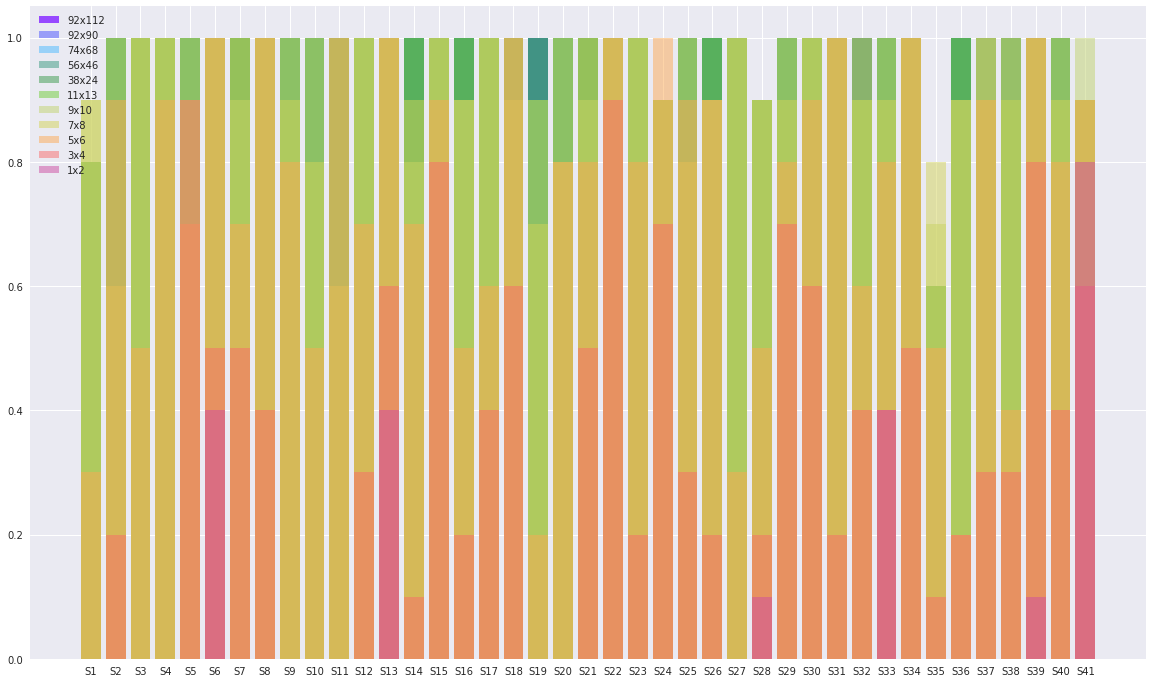

In [17]:
plt.bar(lab, allPrecs[0], color='#9749ff', label='92x112')
plt.bar(lab, allPrecs[1], color='#4952ff', alpha=0.5, label='92x90')
plt.bar(lab, allPrecs[2], color='#49b9ff', alpha=0.5, label='74x68')
plt.bar(lab, allPrecs[3], color='#3a997f', alpha=0.5, label='56x46')
plt.bar(lab, allPrecs[4], color='#3a994b', alpha=0.5, label='38x24')
plt.bar(lab, allPrecs[5], color='#6fce37', alpha=0.5, label='11x13')
plt.bar(lab, allPrecs[6], color='#c1d36e', alpha=0.5, label='9x10')
plt.bar(lab, allPrecs[7], color='#d3d358', alpha=0.5, label='7x8')
plt.bar(lab, allPrecs[8], color='#fcaa53', alpha=0.5, label='5x6')
plt.bar(lab, allPrecs[9], color='#f96b6b', alpha=0.5, label='3x4')
plt.bar(lab, allPrecs[10], color='#ce4ca1', alpha=0.5, label='1x2')

plt.xticks(lab, 
           ['S{}'.format(i+1) for i in range(41)] )

plt.legend()
plt.figsize = (10, 6)

plt.show()